In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

import numpy as np
import pandas as pd

import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
measure = inspect(engine).get_columns('measurement')
for i in measure:
    print(i["name"],i["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


Latest Date 2017-08-23 00:00:00 and 1 year ago 2016-08-23 00:00:00


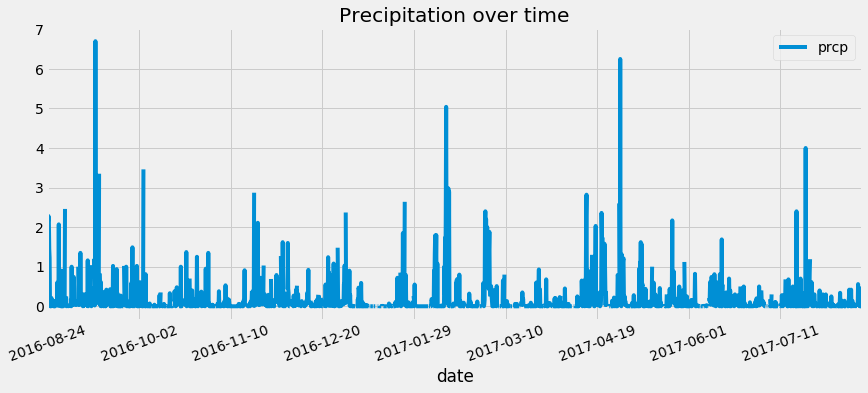

In [14]:



from dateutil.parser import parse
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
a = session.query(Measurement.date).all()
b = pd.DataFrame(a)
last = parse(b['date'].max())
c = last - dt.timedelta(days=365)
print(f'Latest Date {last} and 1 year ago {c}')

# Perform a query to retrieve the data and precipitation scores
d = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= c).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
df_d = pd.DataFrame(d)
df_d = df_d.set_index('date').sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
df_d.plot(title='Precipitation over time',rot=20, figsize = (13,5))

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_d.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [16]:
# Design a query to show how many stations are available in this dataset?
e = session.query(Measurement.station).group_by(Measurement.station).count()
print(f'The number of stations present in the dataset: {e}')

The number of stations present in the dataset: 9


In [61]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

f = session.query(Measurement.station,func.count(Measurement.station),func.max(Measurement.tobs),func.min(Measurement.tobs),func.avg(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc())
print("Station     " "Measument Counts")
for x in f:
    print(x.station,x[1])


Station     Measument Counts
USC00519281 2772
USC00519397 2724
USC00513117 2709
USC00519523 2669
USC00516128 2612
USC00514830 2202
USC00511918 1979
USC00517948 1372
USC00518838 511


In [60]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
for x in f: 
    print(f"Station: {x.station} - Max Temp: {x[2]}, Min Temp: {x[3]},Avg Temp: {round(x[4],1)}")

Station: USC00519281, Max Temp: 85.0, Min Temp: 54.0,Avg Temp: 71.7
Station: USC00519397, Max Temp: 87.0, Min Temp: 56.0,Avg Temp: 74.6
Station: USC00513117, Max Temp: 85.0, Min Temp: 59.0,Avg Temp: 72.7
Station: USC00519523, Max Temp: 85.0, Min Temp: 56.0,Avg Temp: 74.5
Station: USC00516128, Max Temp: 84.0, Min Temp: 58.0,Avg Temp: 70.9
Station: USC00514830, Max Temp: 85.0, Min Temp: 58.0,Avg Temp: 74.9
Station: USC00511918, Max Temp: 87.0, Min Temp: 53.0,Avg Temp: 71.6
Station: USC00517948, Max Temp: 87.0, Min Temp: 58.0,Avg Temp: 74.7
Station: USC00518838, Max Temp: 83.0, Min Temp: 58.0,Avg Temp: 72.7


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000207957EE1D0>]],
      dtype=object)

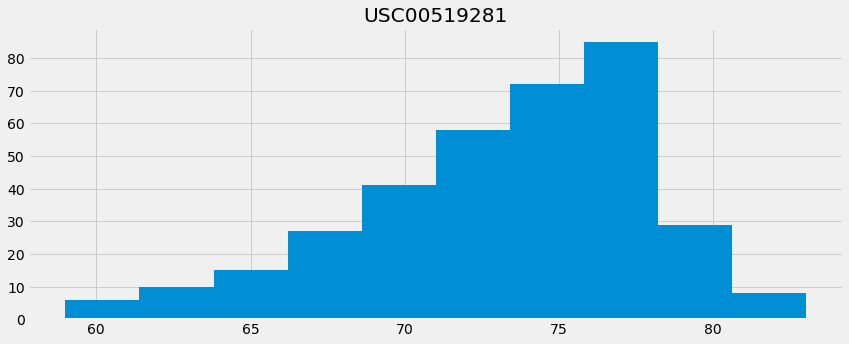

In [70]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last12 = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= c,Measurement.station == "USC00519281").all()
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
df_last12 = pd.DataFrame(last12)
df_last12 = df_last12.set_index('date').sort_index()
df_last12 = df_last12.rename(columns={"tobs":"USC00519281 Temperatures"})
# Use Pandas Plotting with Matplotlib to plot the data
df_last12.hist(figsize = (13,5))

![precipitation](Images/station-histogram.png)

In [89]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(f'Using Dates({c.strftime("%Y-%m-%d")} and {last.strftime("%Y-%m-%d")})')
print(calc_temps(c.strftime("%Y-%m-%d"),last.strftime("%Y-%m-%d")))

Using Dates(2016-08-23 and 2017-08-23)
[(58.0, 74.59058295964125, 87.0)]


In [91]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(f'Using Dates({c.strftime("%Y-%m-%d")} and {last.strftime("%Y-%m-%d")})')
chart = calc_temps(c.strftime("%Y-%m-%d"),last.strftime("%Y-%m-%d"))
print(chart)

Using Dates(2016-08-23 and 2017-08-23)
[(58.0, 74.59058295964125, 87.0)]


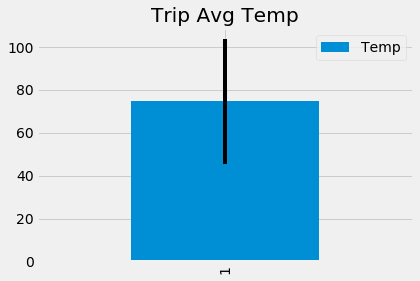

In [128]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

data = chart[0]
ye = data[2]-data[0]
Y = pd.DataFrame(data)
Y = Y.iloc[[1]]
Y = Y.rename(columns={0:"Temp"})
pd.DataFrame(Y).plot.bar(title="Trip Avg Temp",yerr=ye)

In [131]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

f = session.query(Measurement.station,func.sum(Measurement.prcp),func.max(Measurement.tobs),func.min(Measurement.tobs),func.avg(Measurement.tobs)).group_by(Measurement.station).order_by(func.sum(Measurement.prcp).desc())
print("Station     " "Precipitation")
for x in f:
    print(x.station,round(x[1],1))


Station     Precipitation
USC00516128 1068.1
USC00519281 588.6
USC00513117 382.6
USC00519523 295.7
USC00514830 234.5
USC00519397 131.6
USC00511918 92.7
USC00518838 70.9
USC00517948 43.4


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


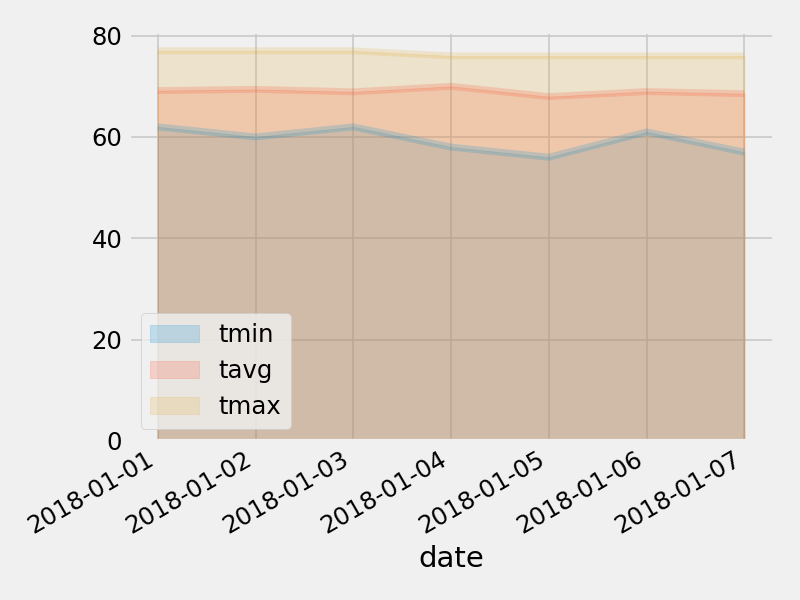

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
